# Part I - 2019 Ford-Go-Bike Data Explorations
## (Communicate Data Findings Project)

## by Nndweleni Sundani

## 1.0 Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset includes observations for February 2019 only. FordGoBike is a bikeshare system which allows users to use bikes available throughought the FordGoBike stations. The bikes are available for use at any time of the day or night everyday. Users can choose to be a subscriber (member) or they can just be a customer for a particular ride.



## 2.0 Preliminary Wrangling
> The dataset received needed some cleaning before i could proceed to perform some useful visualizations which aims to answers the key questions for this project.

### 2.1 Importing packages and exploring our dataset

In [97]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import calendar
import datetime

%matplotlib inline

In [98]:
# Loading our dataset
bike_data = pd.read_csv('201902_fordgobike_tripdata.csv')

In [99]:
# Number of rows and columns
bike_data.shape

(183412, 16)

In [100]:
# Viewing the first 5 rows
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [101]:
# Viewing the rest of the properties of our dataset (e.g. datatype & non-null values)
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [102]:
# Viewing the basic statistical values of our dataset
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### 2.2 Dealing with Null values

In [103]:
# Checking for null values

bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> I found 197 null values for `start_station_id`, `start_station_name`, `end_station_id`, and `end_station_name`. 
> I also found 8265 null values for `member_birth_year`, and `member_gender`. 

In [104]:
# Dropping the null values.

bike_data.dropna(axis = 0, inplace = True)

In [105]:
# Checking if null values have been dropped.

bike_data.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [106]:
# checking the remaining number of rows after dropping rows with null values.

print(bike_data.shape)
print(bike_data.info())

(174952, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB
None


#### Duplications

In [107]:
# Checking for duplications.
bike_data.duplicated().sum()

0

> No duplications found.

### 2.3 Dealing with incorrect DataTypes

In [108]:
# Checking if the datatypes are correct.
bike_data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

>- `start_time`, and `end_time`, should be in a datetime format.
>- `start_station_id`, `end_station_id`, and `bike_id` should be in a string (object) format. 
>- `user_type`, and `member_gender`  should be in a category format.
>- `member_birth_year` should be converted to int datatype.
>- `bike_share_for_all_trip` should be in a boolean format.

In [109]:
# Convering start_time, and end_time, to datetime format.

bike_data.start_time = pd.to_datetime(bike_data.start_time)
bike_data.end_time = pd.to_datetime(bike_data.end_time)

In [110]:
# Converting start_station_id, end_station_id, and bike_id to a string (object) format.

bike_data['start_station_id'] = bike_data['start_station_id'].astype('object')
bike_data['end_station_id'] = bike_data['end_station_id'].astype('object')
bike_data['bike_id'] = bike_data['bike_id'].astype('object')

In [111]:
# Converting user_type, and member_gender to a category format.

bike_data['user_type'] = bike_data['user_type'].astype('category')
bike_data['member_gender'] = bike_data['member_gender'].astype('category')

In [112]:
# Converting member_birth_year to int datatype.

bike_data['member_birth_year'] = bike_data['member_birth_year'].astype(int)

In [113]:
# Converting bike_share_for_all_trip to a boolean format.

#bike_data['bike_share_for_all_trip'] = bike_data['bike_share_for_all_trip'].astype('bool')

bike_data['bike_share_for_all_trip'] = bike_data['bike_share_for_all_trip'].map({'Yes': True, 'No': False})

In [114]:
# Checking if all datatypes changes have been implemented.
bike_data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip              bool
dtype: object

### 2.4 New columns to be added

1. `member_age` and member `age_group` - To capture the age of the member.
2. `start_dayofweek` - To capture the day of the week in which a trip was started. We know that all trips were started in February 2019.
3. `trip_start_hour` - To capture the trips started on hourly basis.
4. `duration_min` - To capture the duration of each trip in minutes as most trip durations were less than an hour long.

#### 2.4.1 Creating new columns `member_age` and `member_age_group`

In [115]:
# Creating a new column (member_age).
# I will calculate the age of each member as at 2019 because this was when the trips were taken.

bike_data['member_age'] = 2019 - bike_data['member_birth_year']

In [116]:
# Creating a new column for the age_group

labels = ['{}s'.format(i) for i in range(10, 61, 10)]
bike_data['age_group'] = pd.cut(bike_data['member_age'], range(10, 71, 10), right=True, labels=labels)

#### Test

In [117]:
bike_data.age_group.dtype

CategoricalDtype(categories=['10s', '20s', '30s', '40s', '50s', '60s'], ordered=True)

#### 2.4.2 Creating new column `trip_dayofweek`:

In [118]:
# Creating a new column (start_dayofweek) by extracting the day of the week from the start_time column.
# I will also set the column data to be ordered categorical data.

bike_data['trip_dayofweek'] = bike_data['start_time'].dt.strftime('%a')  #extracting the day of the week.

daysofweek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ordered_daysofweek = pd.api.types.CategoricalDtype(ordered  = True, categories = daysofweek)
bike_data['trip_dayofweek'] = bike_data['trip_dayofweek'].astype(ordered_daysofweek)


#### 2.4.3 Creating new columns `trip_start_hour`, and `duration_min`:

In [119]:
# Creating a new column (trip_start_hour).

bike_data['trip_start_hour'] = bike_data['start_time'].dt.hour
bike_data['trip_start_hour'] = bike_data['trip_start_hour'].astype('category')

In [120]:
# Creating a new column (duration_min).

bike_data['duration_min'] = bike_data['duration_sec']/60

#### Test

In [121]:
bike_data['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [122]:
# Checking if all changes have been implemented.

print(bike_data.shape)
print(bike_data.info())
bike_data.head(2)

(174952, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null bool
member_age                 174952 non-null int64
age_gro

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,age_group,trip_dayofweek,trip_start_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,False,35,30s,Thu,17,869.75
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,False,47,40s,Thu,12,1030.90


### 2.5 Dealing with outliers

#### 2.5.1 Removing `duration_min` outliers:

In [123]:
bike_data.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

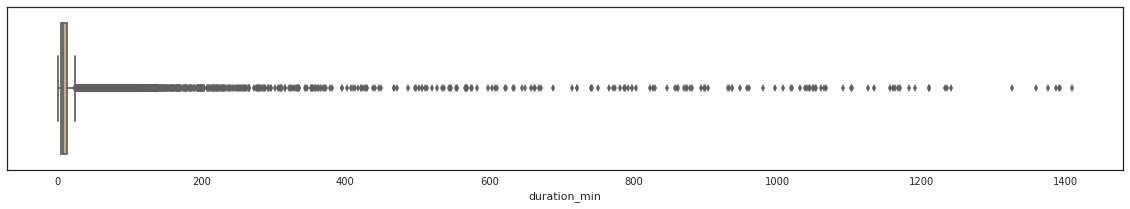

In [124]:
# Plot duration distribution

plt.figure(figsize = [20, 3])
base_color = sns.color_palette()[4]
sns.boxplot(data=bike_data, x='duration_min', color=base_color);

>- The above figure shows that we have outliers that are further away from the majority of our data. Most of the rides take less than 30 minutes.

In [125]:
# Checking statistics for rides that took more than 120 minutes

rides_with_120min_and_more = bike_data[bike_data['duration_min']> 120]
print(rides_with_120min_and_more['duration_min'].describe())

count     538.000000
mean      360.694641
std       309.001370
min       120.016667
25%       148.320833
50%       218.733333
75%       436.104167
max      1409.133333
Name: duration_min, dtype: float64


In [126]:
# checking the propotion of rides taking more than 120 minutes compared with rides that take less than 200 min

bike_data_outliers_proportion = bike_data.query('duration_min > 120').shape[0] / bike_data.shape[0]

print('The percentage proportion of rides that took more than 120 minutes to complete is', 
      "{:.2f}".format(bike_data_outliers_proportion*100),'%') 

print('This means that approximately', "{:.0f}".format(bike_data_outliers_proportion*bike_data.shape[0]), 
      'rides out of', "{:.0f}".format(bike_data.shape[0]), 'rides took more than 120 minutes to complete')

The percentage proportion of rides that took more than 120 minutes to complete is 0.31 %
This means that approximately 538 rides out of 174952 rides took more than 120 minutes to complete


In [127]:
# Removing rows with rides that took more than 120 minutes to complete

bike_data = bike_data.query('duration_min <= 120')

In [128]:
#Checking if the rows have been removed
bike_data.shape

(174414, 21)

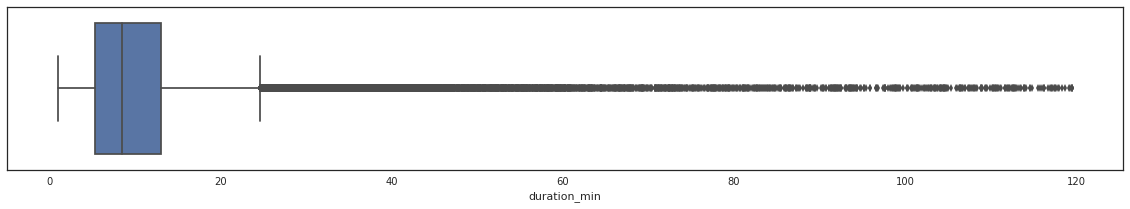

In [129]:
# Plot the new duration distribution 

plt.figure(figsize = [20, 3])
base_color = sns.color_palette()[0]
sns.boxplot(data=bike_data, x='duration_min', color=base_color);

#### 2.5.2 Removing `member_age` outliers:

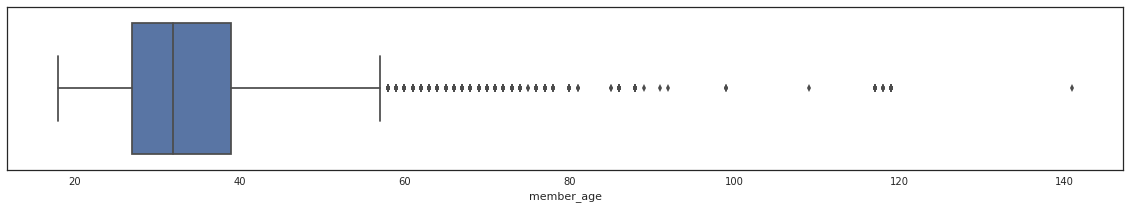

In [130]:
# Plot the age distribution 

plt.figure(figsize = [20, 3])
base_color = sns.color_palette()[0]
sns.boxplot(data=bike_data, x='member_age', color=base_color);

In [131]:
# Removing all rows with member_age more than 70

bike_data = bike_data.query('member_age < 70')

In [132]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173742 entries, 4 to 183411
Data columns (total 21 columns):
duration_sec               173742 non-null int64
start_time                 173742 non-null datetime64[ns]
end_time                   173742 non-null datetime64[ns]
start_station_id           173742 non-null object
start_station_name         173742 non-null object
start_station_latitude     173742 non-null float64
start_station_longitude    173742 non-null float64
end_station_id             173742 non-null object
end_station_name           173742 non-null object
end_station_latitude       173742 non-null float64
end_station_longitude      173742 non-null float64
bike_id                    173742 non-null object
user_type                  173742 non-null category
member_birth_year          173742 non-null int64
member_gender              173742 non-null category
bike_share_for_all_trip    173742 non-null bool
member_age                 173742 non-null int64
age_group           

### 2.6 Removing columns that will not be used

In [133]:
# Dropping unwanted columns

bike_data = bike_data.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 
                'end_station_latitude', 'bike_id'], axis=1)

In [134]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173742 entries, 4 to 183411
Data columns (total 15 columns):
duration_sec               173742 non-null int64
start_time                 173742 non-null datetime64[ns]
end_time                   173742 non-null datetime64[ns]
start_station_name         173742 non-null object
end_station_name           173742 non-null object
end_station_longitude      173742 non-null float64
user_type                  173742 non-null category
member_birth_year          173742 non-null int64
member_gender              173742 non-null category
bike_share_for_all_trip    173742 non-null bool
member_age                 173742 non-null int64
age_group                  173742 non-null category
trip_dayofweek             173742 non-null category
trip_start_hour            173742 non-null category
duration_min               173742 non-null float64
dtypes: bool(1), category(5), datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 14.3+ MB


### 2.7 Export of cleaned dataframe to a csv file

In [135]:
# save the cleaned data to a csv file
bike_data.to_csv('fordgobike_data_clean', index=None)

In [136]:
clean_bike = bike_data

In [137]:
# Checking
print(clean_bike.info())
clean_bike.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173742 entries, 4 to 183411
Data columns (total 15 columns):
duration_sec               173742 non-null int64
start_time                 173742 non-null datetime64[ns]
end_time                   173742 non-null datetime64[ns]
start_station_name         173742 non-null object
end_station_name           173742 non-null object
end_station_longitude      173742 non-null float64
user_type                  173742 non-null category
member_birth_year          173742 non-null int64
member_gender              173742 non-null category
bike_share_for_all_trip    173742 non-null bool
member_age                 173742 non-null int64
age_group                  173742 non-null category
trip_dayofweek             173742 non-null category
trip_start_hour            173742 non-null category
duration_min               173742 non-null float64
dtypes: bool(1), category(5), datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 14.3+ MB
None


(173742, 15)

### 2.8 Questions about the dataset

#### What is the structure of your dataset?

> My dataset has 183412 rows/observations (and now 173742 after removing rows with null values), and 12 columns (or features).

#### What is/are the main feature(s) of interest in your dataset?

> The main features of interest is the trip/ride duration (`duration_min`). 

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  Features such as `user_type`, `member_gender`, `trip_start_hour`, `trip_dayofweek`, and `age_group` are will be useful in my investigation to provide insight on how the trip duration is affected them (the other features). 

# 3.0 Univariate Exploration



### 3.1 What is the distribution of rides duration?

####  `duration_min`

In [138]:
# Checking basic statistics

clean_bike.duration_min.describe()

count    173742.000000
mean         10.658935
std           8.980882
min           1.016667
25%           5.383333
50%           8.483333
75%          13.083333
max         119.566667
Name: duration_min, dtype: float64

<b>Visualization 1: </b>Standard-scaled Trip Duration distribution

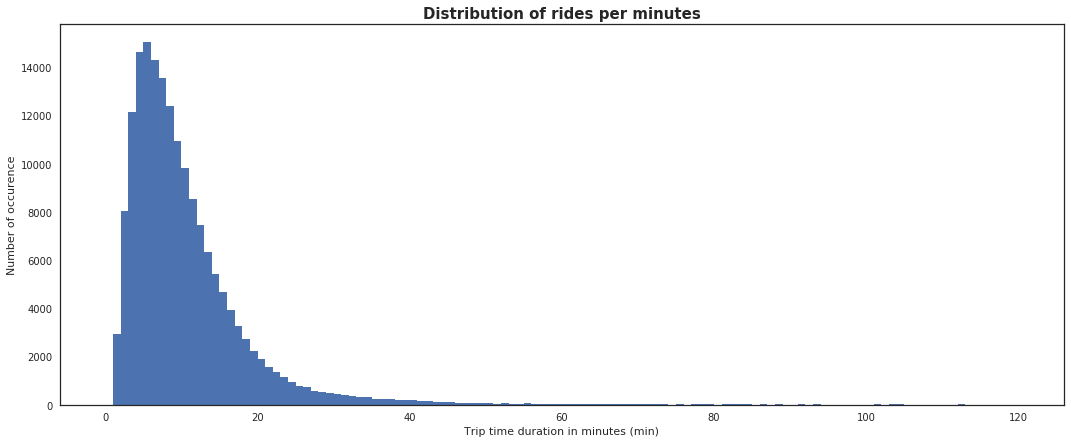

In [139]:
# Plotting a histogram graph using a binsize of i minute

bins = np.arange(0, clean_bike['duration_min'].max()+1, 1)

plt.figure(figsize=(18,7))
plt.hist(data = clean_bike, x = 'duration_min',  bins=bins)
plt.xlabel('Trip time duration in minutes (min)')
plt.ylabel('Number of occurence')
plt.title('Distribution of rides per minutes', fontsize=15, fontweight='bold')
plt.show()


> <b>Observation:</b> The above graph is not readable as more than 75% of the trips did not even exceed 15 minutes duration, while the maximum duration set is 120 minutes. We will try other plots.

<b>Visualization 2:</b>  Violin plot

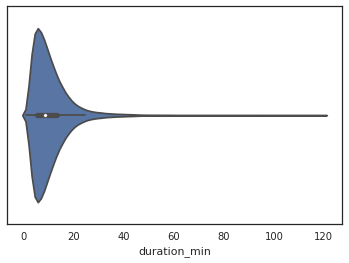

In [140]:
# We try to plot a violing plot.

sns.violinplot(data=clean_bike, x = 'duration_min');

> <b>Observations:</b>The above figure shows a distribution which still has a long tail.

<b>Visualization 3: </b> Plotting the distribution of duration using  log-scale

We will now use a log-scale to visualize same variable (duration_min) because the above graphs have a very long tail

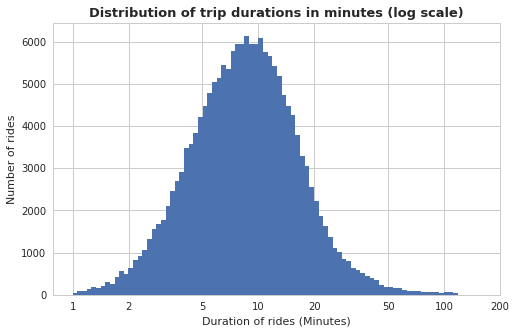

In [141]:
log_binsize = 0.025
bins = 10**np.arange(0, np.log10(clean_bike['duration_min'].max())+log_binsize, log_binsize)
sns.set(style="whitegrid")

plt.figure(figsize=[8,5])
plt.hist(data=clean_bike, x='duration_min', bins=bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200], [1, 2, 5, 10, 20, 50, 100, 200])

plt.xlabel('Duration of rides (Minutes)')
plt.ylabel('Number of rides')
plt.title('Distribution of trip durations in minutes (log scale)', fontsize=13, fontweight='bold')
plt.show()

> <b>Observations: </b>The above distribution looks more like a normal distribution, and we can therefore i accept it.
> It shows a peak number of riders riding for durations between 8 minutes and 11 minutes, and very few riders riding for just above 30 minutes (taking into considerations the fact that we have removed some outliers). Outliers are trips that had a duration of more than 120 minutes.

### 3.2 What is the age (and age group) distribution of bike riders?
`member_age` and `age_group`

In [142]:
# Checking statistics
clean_bike.member_age.describe()

count    173742.000000
mean         34.015724
std           9.679840
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          69.000000
Name: member_age, dtype: float64

<b>Visualization 4:</b> Distribution based on the age of members

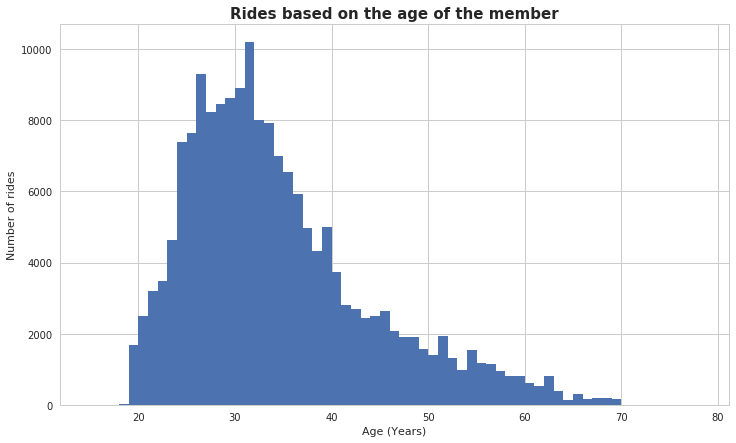

In [143]:
# Plotting a histogram, setting bin size of 1 year
bins = np.arange(15, clean_bike['member_age'].max()+10, 1)

plt.figure(figsize=(12,7))

sns.set(style="whitegrid")
plt.hist(data = clean_bike, x = 'member_age',  bins=bins)
plt.title('Rides based on the age of the member', fontsize=15, fontweight='bold')
plt.xlabel('Age (Years)')
plt.ylabel('Number of rides')
plt.show()

<b>Observations: </b> The youngest riders are 18 years old and this can be considered as a minimum age limit acceptable for members to participate in the Ford-Go-Bike System. The number of rides quickly increases from ages 18-26, and then drops slightly only to again increase from age 27 until the age of 32 which also represent the peak number of rides. From the age of 32, the number of rides decreases (with some negligible slight increases in few instances) until when the maximum age is reached.

<b>Visualizatin 5: </b>Distribution based on age groups 

In [144]:
clean_bike.age_group.value_counts()

20s    69837
30s    63631
40s    21931
50s    11290
10s     4204
60s     2849
Name: age_group, dtype: int64

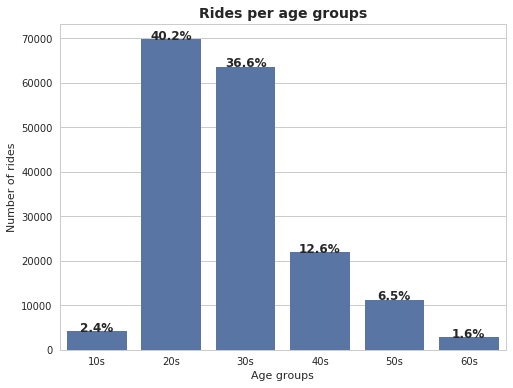

In [145]:
sns.set(style="whitegrid")

# Plotting a bar graph
order = ['10s', '20s', '30s', '40s', '50s', '60s']

plt.figure(figsize=(8, 6))
base_color = sns.color_palette()[0]

ax = sns.countplot(data=clean_bike, x='age_group', color=base_color, order=order)
plt.title('Rides per age groups', fontsize=14, fontweight='bold')
plt.xlabel('Age groups', fontsize=11)
plt.ylabel('Number of rides', fontsize=11)
plt.xticks(rotation=0)

# Adding percentages
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/bike_data.shape[0])
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', fontweight='bold')
    
plt.show()

> <b>Observations: </b> Age groups 20s and 30s have the highest number of rides, while ages 10s, 50s, and 60s contributes less than 10% of the total number of rides. This was as expected because the younger people are still energetic, and it should be noted that the age group 10s only features members from age 18-20.

### 3.3 Number of daily rides per days of the week
#### `trip_dayofweek`

<b>Visualizations 7:</b> Countplot showing the trends on the number of daily rides per days of the week

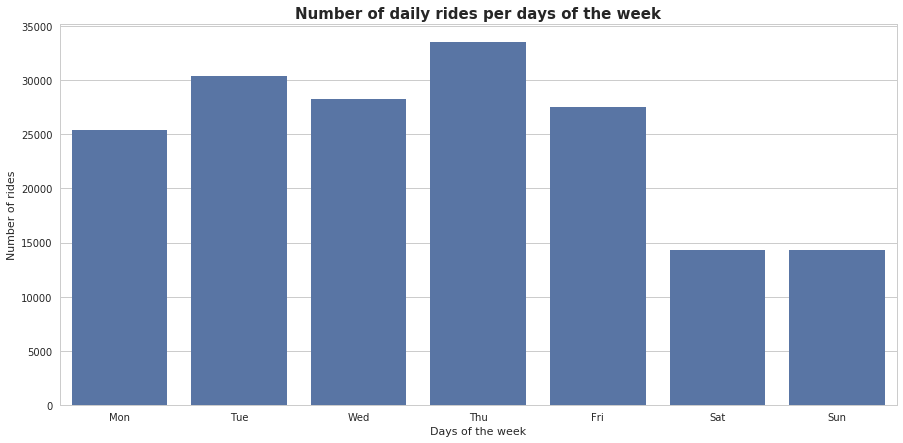

In [146]:
sns.set(style="whitegrid")
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize = (15, 7))
base_color = sns.color_palette()[0]

sns.countplot(data=clean_bike, x='trip_dayofweek', color=base_color, order=order)
plt.xlabel('Days of the week')
plt.ylabel('Number of rides')
plt.title('Number of daily rides per days of the week', fontsize=15, fontweight='bold')
plt.show()

> <b>Observations: </b>The above figure shows that most of the rides are taken on Tuesdays and Thursdays, and weekends (Saturdays and Sundays) has the least number of rides taken.

### 3.4 Number of rides per start time in each hour
#### `trip_start_hour`

<b>Visualizations 8:</b> Countplot showing the number of rides per start time in each hour

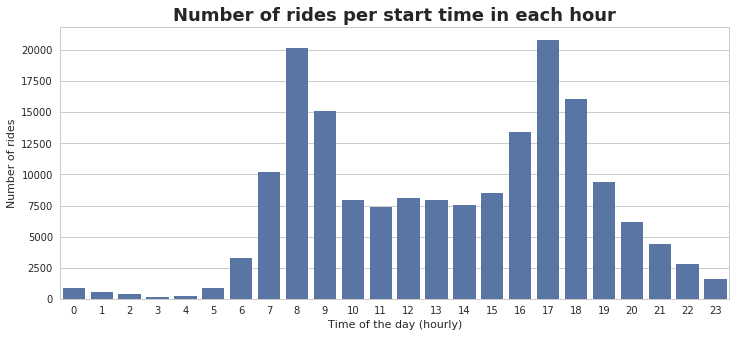

In [147]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
base_color = sns.color_palette()[0]

sns.countplot(data=clean_bike, x='trip_start_hour', color=base_color)
plt.xlabel('Time of the day (hourly)')
plt.ylabel('Number of rides')
plt.title('Number of rides per start time in each hour', fontsize=18, fontweight='bold')
plt.show()

> <b>Observations:</b> The above graph is bimodal in that it has two frequency peaks, one at 08h00, and another peak at 17h00. Therefore, majority of the rides were taken before and after normal working hours.

### 3.5 Proportion of rides based user types

In [148]:
clean_bike.user_type.value_counts()

Subscriber    157467
Customer       16275
Name: user_type, dtype: int64

<b>Visualizations 9:</b> Pie chart showing proportion of rides based on user types

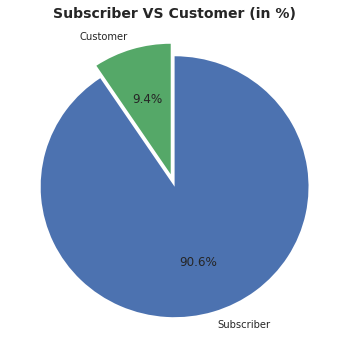

In [149]:
# Plot pie chart in percentages

plt.figure(figsize=[6, 6])
explode = (0, 0.1)
sorted_counts = clean_bike['user_type'].value_counts()
plt.pie(sorted_counts, explode=explode, labels=sorted_counts.index,
       autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Subscriber VS Customer (in %)', fontsize=14, fontweight='bold')
plt.show()

> <b>Observations:</b> Significant majority (90.6%) of riders are subscibers, while only few (9.4%) are non-subscribers.

### 3.6 Proportion of rides based on gender

In [150]:
clean_bike.member_gender.value_counts()

Male      129578
Female     40575
Other       3589
Name: member_gender, dtype: int64

<b>Visualizations 10:</b> Countplot showing the proportion of rides based on gender

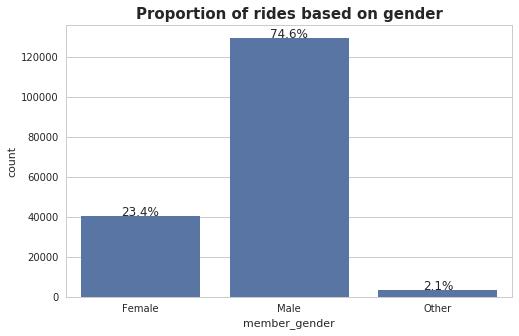

In [151]:
sns.set(style="whitegrid")
base_color = sns.color_palette()[0]
plt.figure(figsize=(8,5))
total = float(len(clean_bike))

ax = sns.countplot(x="member_gender", data=clean_bike, color=base_color)
plt.title('Proportion of rides based on gender', fontsize=15, fontweight='bold')

# Adding percentages
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

> <b>Observations:</b> The number of Male riders significantly surpasses the number of Female riders. The number of male riders is thrice the number of Female riders.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1. `duration_min` - The distribution produced an unusual graph on a standard-scaled plot. The graph had a long a very tail even after i have removed some outliers by setting the maximum duration to 120 minutes. I then re-plotted the same graph using a log-scale and it resulted in a graph which resembled a normal distribution and the long tail was not there anymore. 
>- `member_age` and `age_group` - Both distributions were consistent with what i expected to happen in that the peak age was about age 25-32, and the dominant age group was the 20s. 
>- `trip_dayofweek` - The distribution for the rides based on the days of the week revealed that most of the rides are taken on Tuesdays and Thursdays, and weekends (Saturdays and Sundays) has the least number of rides taken.
>- `trip_start_hour` - The distribution for the rides/trips based on the starting hour (in which the trip was taken) revealed that most rides/trips are taken in the morning (08h00), and late afternoon (17h00). We can conclude that most riders take rides before and after work during the week, and rest on weekends (as can be seen on `trip_dayofweek` distribution.
>- `user_type` - Most users (90.6%) are subscribers, and very few are non-subscribers.
>- `member_gender` - Males accounts for almost 75% of users, and this is consistent with what i have expected.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. `duration_min` - This is a new column which was derived from `duration_sec` column.The distribution had a very long tail which was partly influenced by the duration values which i considered to be outliers after i visualized the data in a box plot. I found that the percentage proportion of rides that took more than 120 minutes to complete was only 0.31 %. This means that approximately 538 rides out of 174952 rides took more than 120 minutes to complete. I then considered all rides with a duration of more than 120 minutes to be outliers and then i removed them.
>- `member_age` and `age_group` - Both are new columns which were both derived from `member_birth_year` column. When i explored the age feature using a boxplot i discovered that were data points that were located outside the whiskers of the box plot and some were very far. The ages outside the whiskers were from just before the age of 60 until just about 160 years. I then considered ages after 70 years as outliers and removed them from my dataframe.
>- `trip_dayofweek` - This is a new column which was derived from `start_time` column.
>- `trip_start_hour` - This is a new column which was derived from `start_time` column.
>- `user_type` - Converted it to a category format as the observations represented a label belonging to a particular category, and this helps when plotting especially where order is required.
>- `member_gender` - Was Converted to a category format as the observations represented a label belonging to a particular category, and this helps when plotting especially where order is required.


## 4.0 Bivariate Exploration

In this section, i will investigate relationships between pairs of variables in my
dataset. I will make use of the variables that i have already introduced in the previous section (univariate exploration).

In [152]:
clean_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173742 entries, 4 to 183411
Data columns (total 15 columns):
duration_sec               173742 non-null int64
start_time                 173742 non-null datetime64[ns]
end_time                   173742 non-null datetime64[ns]
start_station_name         173742 non-null object
end_station_name           173742 non-null object
end_station_longitude      173742 non-null float64
user_type                  173742 non-null category
member_birth_year          173742 non-null int64
member_gender              173742 non-null category
bike_share_for_all_trip    173742 non-null bool
member_age                 173742 non-null int64
age_group                  173742 non-null category
trip_dayofweek             173742 non-null category
trip_start_hour            173742 non-null category
duration_min               173742 non-null float64
dtypes: bool(1), category(5), datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 19.3+ MB


In [153]:
# setting the variables that will be used

numeric_vars = ['duration_min', 'member_age']
categoric_vars = ['user_type', 'member_gender', 'age_group', 'trip_dayofweek']

<b>Visualizations 11:</b> Correlation matrix for duration(min) VS member age

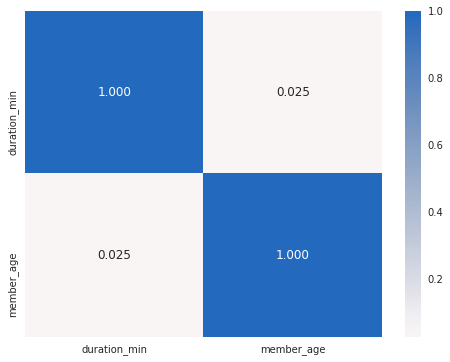

In [154]:
# Plotting a correlation matrix for our numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(clean_bike[numeric_vars].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0);

> <b>Observations:</b> The above correlation matric shows that there is no correlation between `duration_min` and `member_age`. 

<b>Visualizations 12:</b> Scatterplot showing the relationship between `duration_min` and `member_age`

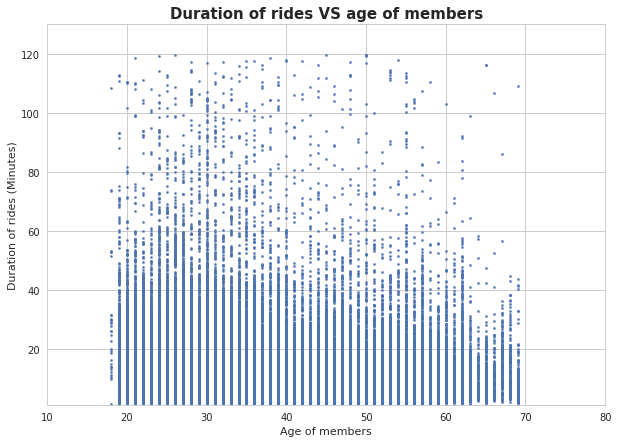

In [155]:
plt.figure(figsize=(10,7))
plt.scatter(clean_bike['member_age'], clean_bike['duration_min'], s=5)
plt.axis([10, 80, 1, 130])
plt.title('Duration of rides VS age of members', fontsize=15, fontweight='bold')
plt.xlabel('Age of members')
plt.ylabel('Duration of rides (Minutes)')
plt.show()

><b>Observations: </b>Users that are older usually ride for a shorter duration compared with their younger counterparts.

<b>Visualizations 13:</b> Boxplot Subplots showing the relationship of betwen our numeric and categoric variables

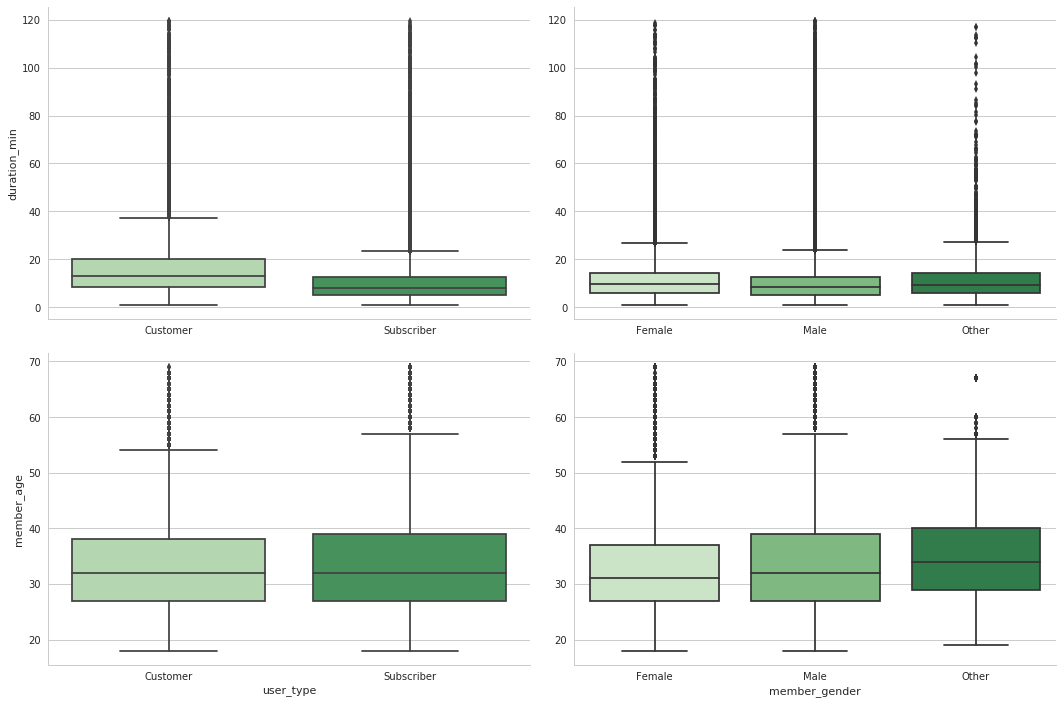

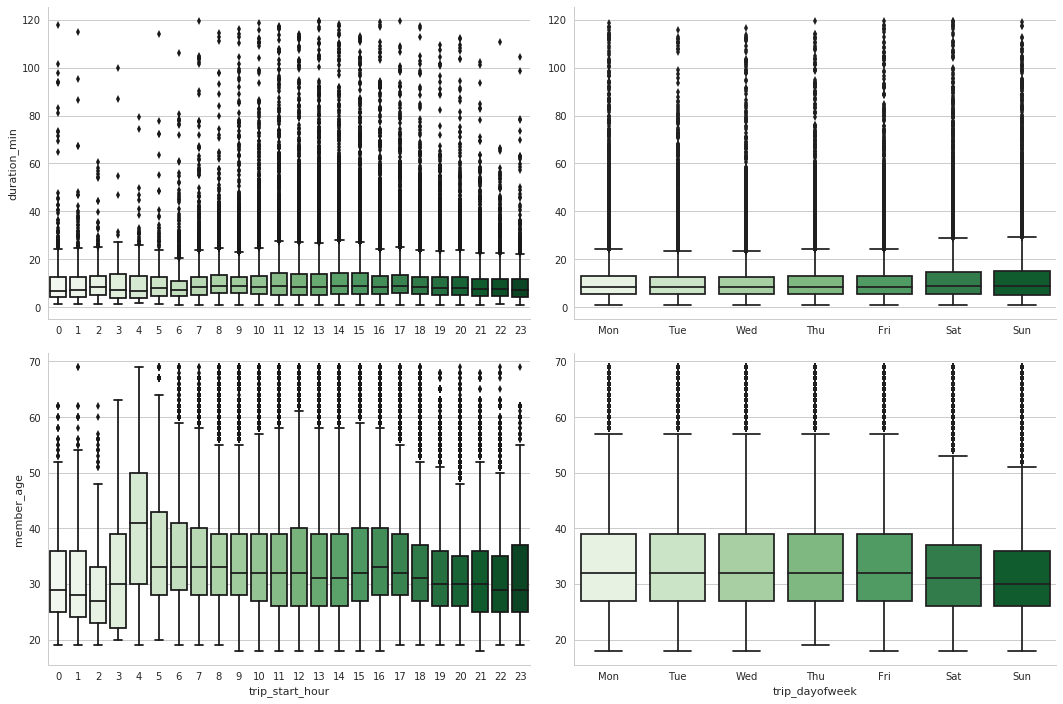

In [156]:
# We will now plot a matrix of numeric variables against categorical variables

def boxgrid(x, y, **kwargs):
    """Quick hack for creating box plots with seaborn's PairGrid"""""
    sns.boxplot(x,y, palette='Greens', saturation=0.7)

graph1 = sns.PairGrid(data=clean_bike, x_vars=('user_type', 'member_gender'), y_vars=numeric_vars, 
                     aspect=1.5, size=5)
graph2 = sns.PairGrid(data=clean_bike, x_vars=('trip_start_hour', 'trip_dayofweek'), y_vars=numeric_vars, 
                     aspect=1.5, size=5)


graph1.map(boxgrid)
graph2.map(boxgrid)

plt.show()

<b>Observations:</b>
>1. Regarding `user_type` - I observed that Customers users being a little younger than Subscriber users, they tend to ride for longer durations as they comprises more younger users who are still more energetic.
>- Regarding `member_gender` - I observed that the age coverage for Males is wider than that of Females there are older Males represented whereas there are fewer older Females represented. This explains our observation that Females are riding for a longer duration than Males as majority of Females participants are actually younger Females compared to their Males counterparts.
>- Regarding the `age_group` - I observed that category that did not specify gender (other) actually ride for longer durations and they are older than than Males and Females. The mean duration for females surpasses that of Males, and it is woth noting that there were not much elderly Female participants (i.e. their upper boxplot whisker is at the age of 52).
>- Regarding `trip_start_hour` - I observed that the rides that starts in the early hours of the morning (between 3:00 - 4:00 AM), have longer duration and the mean age of participants is 30 years. Rides that starts in the afternoon (between 11:00 and 15:00) also have a longer duration and the mean age of participants is 31-32 years. The elderly people (over 40 years) prefers to start their rides in the early hours of the morning (between 4:00 - 5:00 AM) than any other time of the day. The younger people (less than 30 years) prefers to start their rides in the late hours (22:00) of the night up until early hours of the morning (02:00).
>- Regarding the `trip_dayofweek` - I observed that ride durations on weekends (Sat and Sun) were actually longer and they are dominated by younger people compared with other days of the week. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>1.  In terms of <b>age</b>, users that are older usually ride for a shorter duration compared with their younger counterparts. 
>- In terms of <b>gender</b>, category "other" rides for longer duration followed by Female category.
>- In terms of <b>user types</b>, Customers rides for longer durations compared with Subscriber users. Customer users have a mean age which is younger than the mean age of Subscriber users.
>- In terms of <b>trip start hour</b>, the longer durations of rides occurs between 3:00 - 4:00 AM, and between 11:00 and 15:00. 
>- In terms of <b>trip day of the week</b>, on Saturdays and Sundays we have observed that users ride for a longer duration compared with other days of the week, and participants are mostly the younger users.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The elderly people (over 40 years) prefers to start their rides in the early hours of the morning (between 4:00 - 5:00 AM) than any other time of the day.

## 5.0 Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 5.1 Relationship between Member age, Trip duration, and User type

<b>Visualizations 14:</b> Stripplot showing relationship between member age, trip duration, and user type 

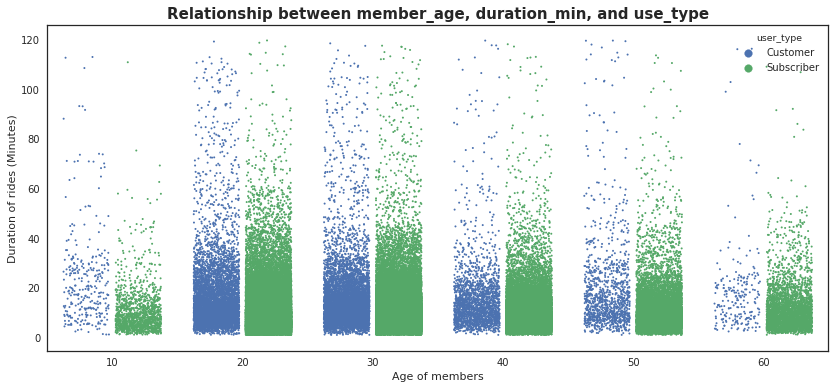

In [157]:
plt.figure(figsize=(14,6))
sns.set_style("white")

# Create age intervals of 10 years using floor division
clean_bike['member_age_int']=((clean_bike['member_age']//10)*10).astype(int)

sns.stripplot(data=clean_bike, x='member_age_int', y='duration_min', hue='user_type',
             size=2, 
             jitter=0.35, dodge=True)

plt.title('Relationship between member_age, duration_min, and use_type', fontsize=15, fontweight='bold')
plt.xlabel('Age of members')
plt.ylabel('Duration of rides (Minutes)')

plt.show()

> <b>Observations:</b> The youngest and the oldest users have a reduced duration of rides compared with the youth and young adults. It should be noted that the number of Customers users also reduced significantly among the youngest and the oldest users compared to other periods.

### 5.2 Relationship between Trip duration, User type, and Gender

<b>Visualizations 15:</b> Factorplot to show the daily bike trips trends by user type and gender

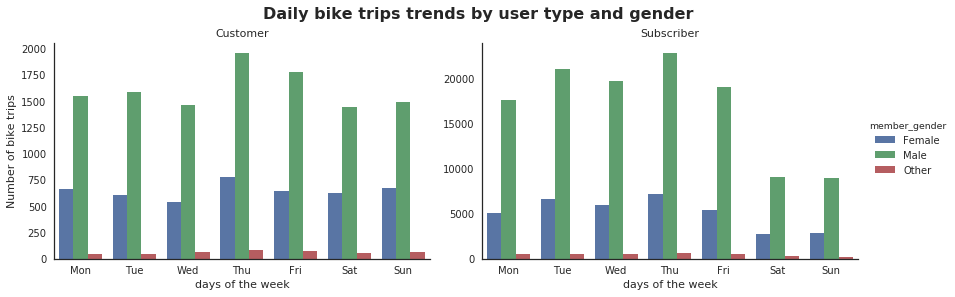

In [158]:
# Daily bike trips trends by user type and gender

g = sns.factorplot(data=clean_bike, 
                   x='trip_dayofweek', 
                   col='user_type', 
                   hue='member_gender', kind='count', sharey=False, size=4, aspect=1.5)

g.set_axis_labels('days of the week', 'Number of bike trips')
g.set_titles('{col_name}')
g.fig.suptitle('Daily bike trips trends by user type and gender', y=1.03, fontsize=16, fontweight='semibold');

<b>Observations:</b> 

> For Customer users -  Male users increased slighly while Female users dropped slightly on Mondays & Tuesdays, while on other days the increase in male riders also shows an increase in Female riders. Thursday is the most preferred day for all genders. There is a slight drop on the number of riders undertaken by all genders when comparing Mon-Fri and Weekends (Sat-Sun).

> For Subscriber users - Thursday is the most preferred day for all genders. There is a significant drop on the number of riders undertaken by all genders when comparing Mon-Fri and Weekends (Sat-Sun).

### 5.3 Trends for the mean trip duration based on the days of the week and user type

<b>Visualizations 16:</b> Point plot for the mean duration based on the days of week and user type

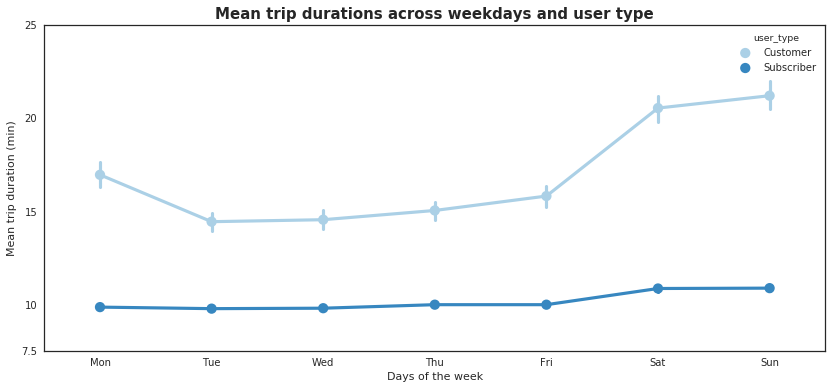

In [160]:
# Point plot 

fig = plt.figure(figsize=[14,6]);

ax = sns.pointplot(data=clean_bike, x='trip_dayofweek', y='duration_min', hue='user_type',
                  palette='Blues')

plt.title('Mean trip durations across weekdays and user type', fontsize=15, fontweight='bold')
plt.ylabel('Mean trip duration (min)')
plt.xlabel('Days of the week')
plt.yticks([7.5, 10, 15, 20, 25], [7.5, 10, 15, 20, 25])

plt.show()

> <b>Observations:</b> The above shows that on average, Customers spend more time riding a bike than Subscribers in the whole week. The average duration for customers is higher on Mondays, and on weekends (reaching a peak on Sundays), while subscribers have a relatively constant average duration throughout the week except for Weekends where it slightly increases.

### 5.4 Daily mean bike trips duration trends by user type and trip start hour

<b>Visualizations 17:</b> Pointplot showing the daily mean bike trips duration trends by user type and trip start hour

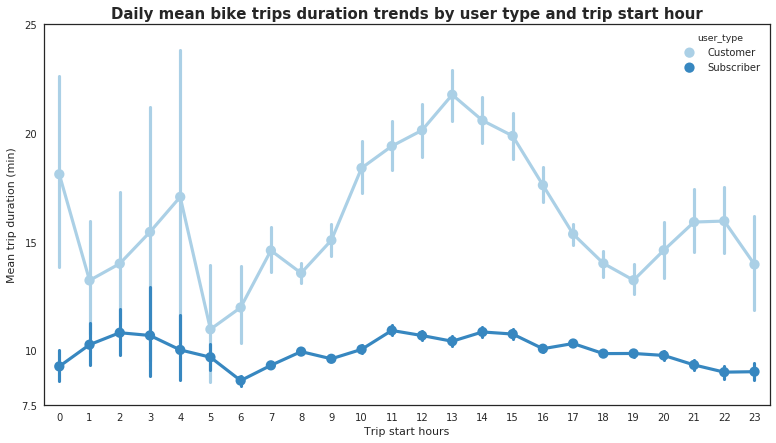

In [167]:
# Point plot 

fig = plt.figure(figsize=[13,7]);
ax = sns.pointplot(data=clean_bike, x='trip_start_hour', y='duration_min', hue='user_type',
                  palette='Blues')

plt.title('Daily mean bike trips duration trends by user type and trip start hour', fontsize=15, fontweight='bold')
plt.ylabel('Mean trip duration (min)')
plt.xlabel('Trip start hours'))
plt.yticks([7.5, 10, 15, 20, 25], [7.5, 10, 15, 20, 25])
plt.show()

<b>Observations:</b> Customers have a longer trip mean duration than Subscribers, and their trip duration gradually improves from the morning and reaches its peak in the afternoon (13:00), while the mean duration of subscribers tend to stay constant for the most part of the day.

### 5.5 Weekly bike trips trends by user type and age group

<b>Visualizations 18:</b> Factorplot showing weekly bike trips trends by user type and age group

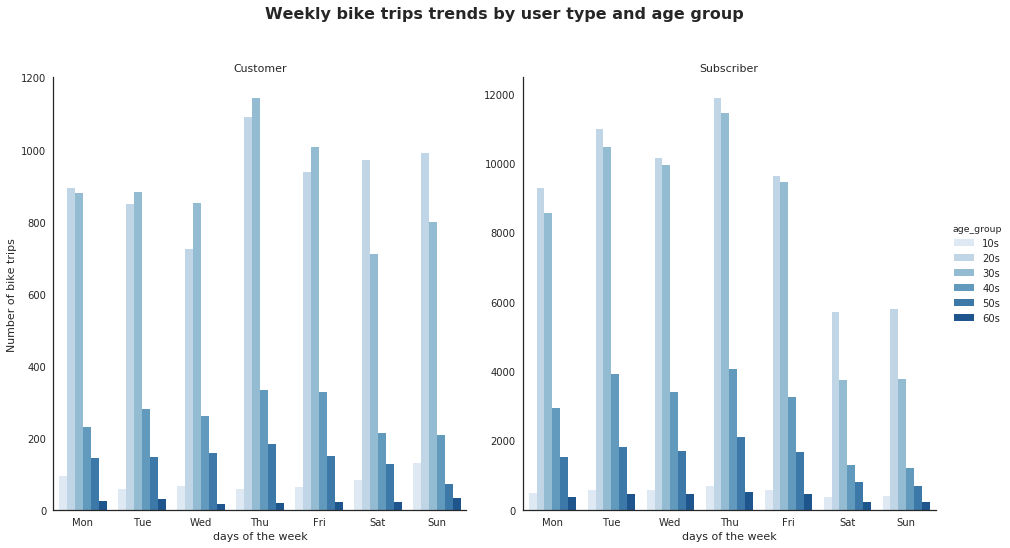

In [168]:
g = sns.factorplot(data=clean_bike, 
                   x='trip_dayofweek', 
                   col='user_type', 
                   hue='age_group', kind='count', palette='Blues', sharey=False, aspect=1.5)

g.set_axis_labels('days of the week', 'Number of bike trips')
g.set_titles('{col_name}')
g.fig.suptitle('Weekly bike trips trends by user type and age group', y=1.03, fontsize=16, fontweight='semibold');

# Set plot dimensions - Figure level
g.fig.set_size_inches(14,8);

<b>Observations:</b>

><b>Customers</b> of the age group 30s are dominating in terms of the number of trips during the week (Mon-Fri), while Customers of age group 20s significantly dominates on weekends (Sat-Sun). 

> <b>Subscribers</b> of the age group of 20s are dominating in terms of the number of trips throughout the whole week, followed by the 30s age group.

### 5.6 Weekly bike trips trends by user type and trip start hour

<b>Visualizations 19:</b> Heatmap showing weekly bike trips trends by user type and trip start hour

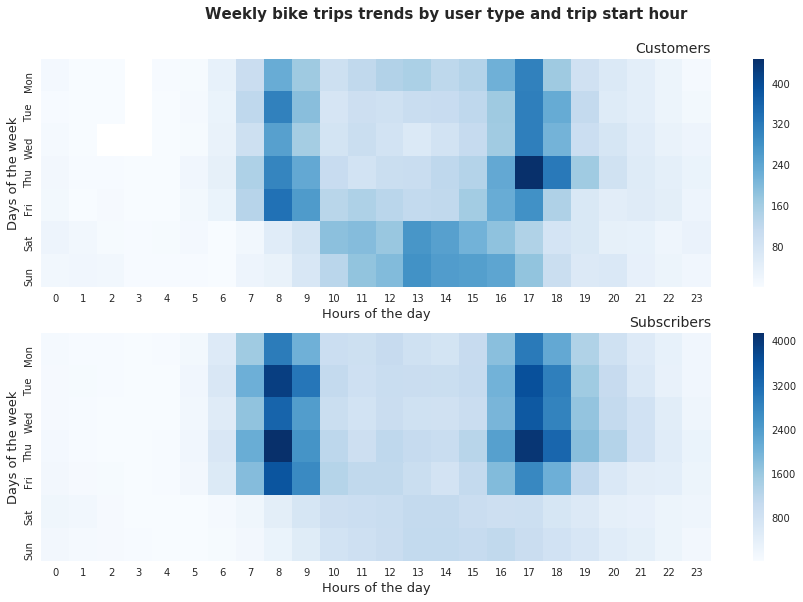

In [169]:
plt.figure(figsize=(15,9))

plt.subplot(2, 1, 1)
customers = clean_bike.query('user_type == "Customer"')
cus_counts = customers.groupby(['trip_dayofweek', 'trip_start_hour']).size()
cus_counts = cus_counts.reset_index(name='count')
cus_counts = cus_counts.pivot(index='trip_dayofweek', columns='trip_start_hour', values='count')
sns.heatmap(cus_counts, cmap='Blues')
plt.title('Customers', loc='right', fontsize=14)
plt.xlabel('Hours of the day', fontsize=13)
plt.ylabel('Days of the week', fontsize=13)

plt.subplot(2, 1, 2)
subscribers = clean_bike.query('user_type == "Subscriber"')
subs_counts = subscribers.groupby(['trip_dayofweek', 'trip_start_hour']).size()
subs_counts = subs_counts.reset_index(name='count')
subs_counts = subs_counts.pivot(index='trip_dayofweek', columns='trip_start_hour', values='count')
sns.heatmap(subs_counts, cmap='Blues')
plt.title('Subscribers', loc='right', fontsize=14)
plt.xlabel('Hours of the day', fontsize=13)
plt.ylabel('Days of the week', fontsize=13)

plt.subplots_adjust(top=0.9)
plt.suptitle('Weekly bike trips trends by user type and trip start hour', fontsize=15, fontweight='bold')
plt.show()

<b>Observations:</b>

>1. <b>For both customers and Subscribers,</b> on Mondays-Fridays, Most activities happens from 7:00 to 9:00 (peak at 8:00), and again on 16:00 to 18:00 (peak at 17:00)
>- <b>For customers,</b> on Saturdays-Sundays, most activities happens from 10:00 to 17:00 (peak at 13:00 to 14:00).
>- <b>For Subscribers,</b> on Saturdays-Sundays, activities are very limited and it is a little busier from 10:00 to 16:00 when comparing with other times of the day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1. The heatmap (Refer to Visualization 19) strenthened our observation that we had already made regarding the trends on weekends (Sat-Sun), whereby we saw that Customers had a slight drop in activities on weekends compared to other days of the week. Whereas Subscribers have a significant drop in activities during the weekend. 
>- Generally, Customers have a longer trip duration (Refer to Visualization 17). Customers trip duration significantly improves from the morning and reaches its peak in the afternoon (13:00), while the mean duration of subscribers tend to stay constant for the most part of the day.
>- Thursday is the most preffered day for taking the ride for all genders and both user types.
>- Both user types have an average longer trip duration on weekends (Saturdays and Sundays).

### Were there any interesting or surprising interactions between features?

> 1. The daily trend for the number of trips taken by customer users was very consistent in that there was just a slight drop in the number of rides taken on weekends (Saturdays and Sundays), whereas there was a big drop on the Subscribers users.

>2. Regarding the age_group - I observed that category that did not specify gender (other) actually ride for longer durations and they are older than than Males and Females. The mean duration for females surpasses that of Males, and it is woth noting that there were not much elderly Female participants (i.e. their upper boxplot whisker is at the age of 52). I found this to be very surprising as i expected Males to ride for longer durations.

## 6.0 Conclusions

> 1. User type is an important variable which plays a key role in influencing the duration of the ride. Although Subscribers make alot of trips than Customers, Customers actually spend more time riding a bike than Subscribers in the whole week (reaching a peak on weekends). Both Customers and Subscribers have an average longer trip duration on weekends (Saturdays and Sundays) although Subscribers have a significant drop in terms of the number of trips they make on weekends. Customers users comprises more younger users (who are still more energetic) than the Customer useras. The majority of Customers are likely to be tourists or occasional users and therefore would not nesessarily need to subscribe to the service. 

>2. The trip start time has an effect on the duration of the trip, in that rides that starts in the early hours of the morning (3:00 - 4:00 AM) tend to have longer duration (and the mean age of participants is 30 years). Rides that starts in the afternoon (11:00 and 15:00) also have a longer duration (and the mean age of participants is 31-32 years). 

>3. Thursday is the most preferred day for many riders irrespective of gender and user type. The elderly people (over 40 years) prefers to start their rides in the early hours of the morning (between 4:00 - 5:00 AM) than any other time of the day irrespective of the day of the week. The duration of rides for both Customers and Subscribers decreases between the ages of 60 and 70, and it should be noted that the number of Customers users also reduced significantly in this period compared to othe periods. 

>4. Having plotted a point-plot graph, i was able to verify that, on average customers have a longer trip duration than Subscribers, and it further shows that their trip duration significantly improves from the morning and reaches its peak in the afternoon (13:00), while the average duration of subscribers tend to stay constant for the most part of the day. The majority of Customers are likely to be tourists or occasional users and therefore would not nesessarily need to subscribe to the service. 

>5. There were other variables that i investigated such as gender, age group and age. These variables although they did indicate some relationship with the main variable of interest, they however did not yield a compelling evidence that i could use to demonstrate their impact on duration of rides. It could be useful to explore these with additional data from other locations and the other months that were not included in the dataset i received.
